<a href="https://colab.research.google.com/github/arthur422tp/arthur422/blob/master/%E7%94%9F%E6%88%90%E5%BC%8FAI%E4%BD%9C%E6%A5%AD%E4%BA%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

主題三

In [141]:
import numpy as np


def entropy(p):
    '''
    以下為手刻的entropy函數code
    '''
    p_array = np.array(p)   #確保輸入的p是一個np.array
    prob_distri_p = p_array / np.sum(p_array) #p必須是一個機率分布，考慮到之後想要以隨機方式生成p的array，在這裡對p先做一次normalization
    return np.sum(-prob_distri_p* np.log(prob_distri_p)) #根據entropy函數的定義，回傳。

def kl_divergence(p, q):
    '''
    以下為手刻的kl_divergence函數code
    '''
    p_array = np.array(p)
    prob_distri_p = p_array / np.sum(p_array)
    q_array = np.array(q)
    prob_distri_q = q_array / np.sum(q_array)
    #同entropy函數的前置處理

    return np.sum(prob_distri_p * np.log(prob_distri_p / prob_distri_q)) #根據kl_divergence的定義，回傳。

In [142]:
###最近太操電腦了，怕它罷工，隨機生成一維、長度為50的np.array就好
length = 100
p = np.random.rand(length)
q = np.random.rand(length)

In [143]:
###看看長怎樣
print(p)
print(q)

[0.97300188 0.46765147 0.5453711  0.32517621 0.38198311 0.81220055
 0.18453674 0.21920516 0.17897842 0.02885253 0.25801825 0.24735744
 0.03758419 0.42433706 0.74216785 0.91387087 0.21226266 0.88962816
 0.71958492 0.74932545 0.26962645 0.98531149 0.59520695 0.86005223
 0.13826205 0.37251843 0.26887312 0.05213466 0.64567461 0.32352037
 0.12301202 0.58309238 0.25854917 0.04541877 0.31935777 0.72052603
 0.73200298 0.53019116 0.10834664 0.09957428 0.17341915 0.81640638
 0.81649059 0.99394008 0.24244342 0.69412322 0.39000926 0.67248348
 0.09971109 0.46231386 0.37847328 0.66415153 0.83881949 0.99809524
 0.18741883 0.71435113 0.95653934 0.87084031 0.23024833 0.31786524
 0.18517115 0.24781877 0.59176469 0.45870215 0.24160821 0.13609671
 0.06248071 0.25945083 0.97391099 0.28971295 0.61269124 0.27663843
 0.62806192 0.07501314 0.04634478 0.49147123 0.28267972 0.58073163
 0.52864736 0.0301776  0.3112147  0.8067703  0.47573404 0.09927566
 0.76150173 0.51206898 0.53295254 0.48911041 0.51904165 0.3446

In [144]:
###看看成果
entropy(p)

4.39118313619837

In [145]:
entropy(q)

4.3847882632797255

In [146]:
kl_divergence(p, q)

0.489239909850462

In [147]:
kl_divergence(q, p)


0.4890793833336359

這邊可以注意到kl_divergence並沒有symmetric的性質。


下面作一些可視化的處理

In [148]:
prob_distri_p = p / np.sum(p)
prob_distri_q = q / np.sum(q)
kl_result = kl_divergence(prob_distri_p, prob_distri_q)
entropy_p = entropy(prob_distri_p)
entropy_q = entropy(prob_distri_q)

可視化我們隨機生成的P、Q的KL divergence

KL divergnece：0.4892


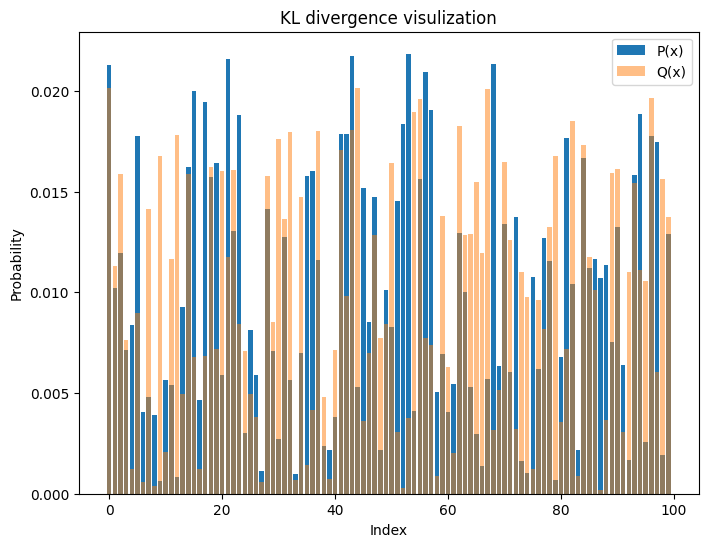

In [149]:
###這裡稍微偷懶，用現成的KL divergence函數，順便檢查一下跟我們自己手刻的有無差別。
from scipy.special import rel_entr
kl_divergence = np.sum(rel_entr(prob_distri_p, prob_distri_q))
print(f"KL divergnece：{kl_divergence:.4f}")
plt.figure(figsize=(8, 6))
plt.bar(range(len(prob_distri_p)), prob_distri_p, label='P(x)')
plt.bar(range(len(prob_distri_q)), prob_distri_q, label='Q(x)', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Probability')
plt.title('KL divergence visulization')
plt.legend()
plt.show()

KL divergence的函數圖

<ipython-input-160-7c8f01902184>:4: RuntimeWarning: divide by zero encountered in log
  Q == np.log(-x)
<ipython-input-160-7c8f01902184>:4: RuntimeWarning: invalid value encountered in log
  Q == np.log(-x)


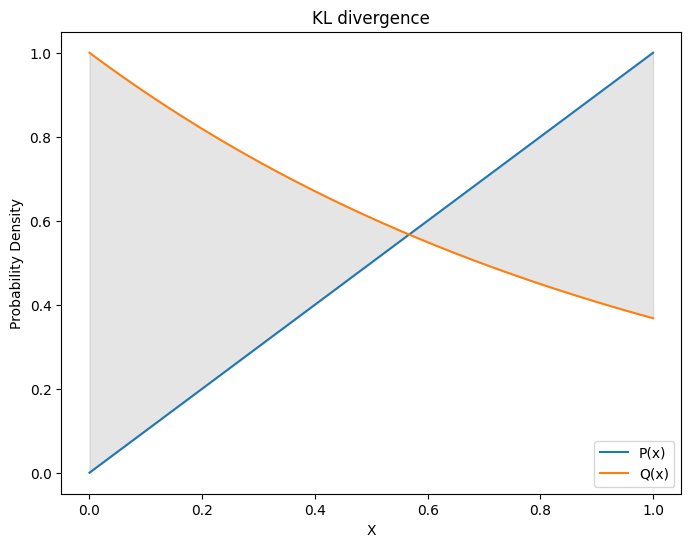

KL散度為：0.4892


In [160]:
###灰色區域面積即為KL divergence
x = np.linspace(0, 1, 100)
P = x
Q == np.log(-x)

plt.figure(figsize=(8, 6))
plt.plot(x, P, label='P(x)')
plt.plot(x, Q, label='Q(x)')
plt.fill_between(x, P, Q, alpha=0.2, color='gray')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('KL divergence')
plt.legend()
plt.show()

print(f"KL散度為：{kl_divergence:.4f}")